In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
ds = xr.open_dataset('../../data/raw_data.nc', engine='netcdf4')
display(ds)

<xarray.Dataset> Size: 54MB
Dimensions:  (lat: 360, lon: 720, time: 52)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 416B 2026-01-01 2026-01-02 ... 2026-02-21
Data variables:
    tmax     (time, lat, lon) float32 54MB ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2026-02-22 16:37:46

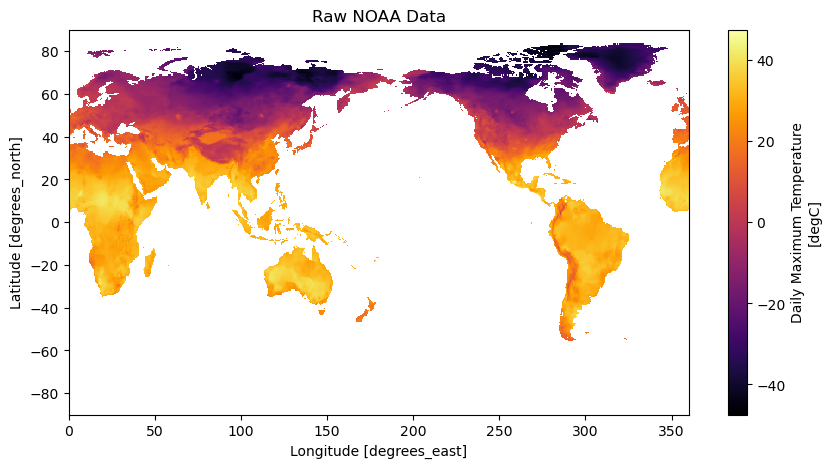

In [6]:
latest_temp = ds['tmax'].isel(time=-1)

plt.figure(figsize=(10, 5))
latest_temp.plot(cmap='inferno')
plt.title("Raw NOAA Data")
plt.show()

#seems like the continents are cut out - maybe because of lat/long values

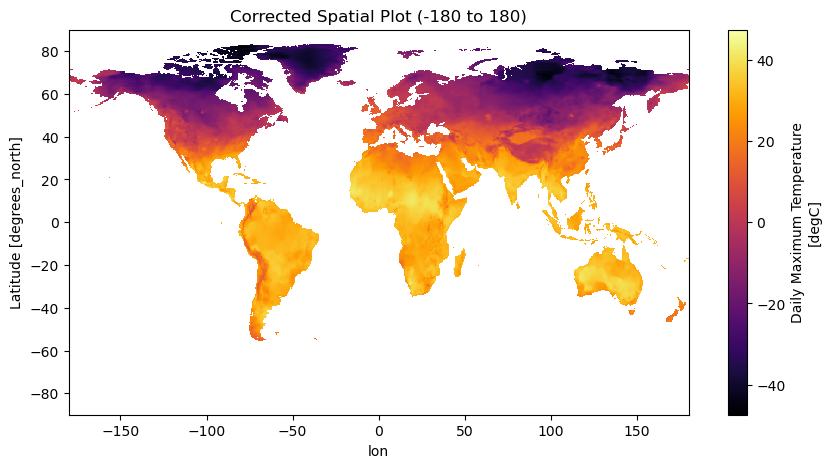

In [7]:
# Fix: 0-360 longitude grid to -180 to 180
fixed_temp = latest_temp.copy()
fixed_temp.coords['lon'] = (fixed_temp.coords['lon'] + 180) % 360 - 180
fixed_temp = fixed_temp.sortby(fixed_temp.lon)

plt.figure(figsize=(10, 5))
fixed_temp.plot(cmap='inferno')
plt.title("Corrected Spatial Plot (-180 to 180)")
plt.show()